<a href="https://colab.research.google.com/github/khalidme94/ML/blob/CH_9/Khalid_Almalki_SDA_ML_Week2_Day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
# Import what you feel is neccessary from scikit-learn


<center><H1>Adult Dataset Classification</H1></center>


<p align="center">
  <img width="700" height="350" src="https://media.giphy.com/media/HoffxyN8ghVuw/giphy.gif">
</p>

### Target = "<=50k"

### [Data Dictionary/Details](https://archive.ics.uci.edu/ml/datasets/Adult)

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- "<=50k" = >50K, <=50K (TARGET)

<center><H3>-----RULES-----</H3></center>

<p align="center">
  <img width="700" height="350" src="https://media.giphy.com/media/iB4PoTVka0Xnul7UaC/giphy.gif">
</p>

### Your data has already been split into training and testing sets, do not use `train_test_split`
### Only use your training set for EDA, Cleaning, Modeling, etc.
- **You will have to perform the same transformations on your test set that you apply to your training set. The column names are exactly the same as your training set.**

### **DO NOT** look into your test set until you are ready to test the accuracy of your model. Your test set is supposed to represent unseen data and lets treat it that way until we are ready to test our accuracy. Your transformations on your training set should work on your test set since it has the exact same column names and the values are exactly the same.



In [2]:
# Starter Code --DO NOT ADJUST--
col_names = ["age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "ooccupation", "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country", "target"]
training = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", names=col_names).drop("race", axis=1)
test = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test", names=col_names, skiprows=1).drop("race", axis=1)

training["target"] = training["target"].apply(lambda x: x.strip())
test["target"] = test["target"].apply(lambda x: x.strip()[:-1])

# Create Train
X_train = training.drop("target", axis=1)
y_train = training["target"]

# Create Test
X_test = test.drop("target", axis=1)
y_test = test["target"]

### **Determine your baseline model accuracy**

Exploring the target

In [3]:
training.target.value_counts()

<=50K    24720
>50K      7841
Name: target, dtype: int64

Ok!

As seen it is a categorical value so I need to change values to (1,0)

Assumption:
- "<=50K" will be 1
- ">50K" will be 0

In [4]:
training["target"] = training["target"].replace(['<=50K','>50K'],(1,0))
test["target"] =test["target"].replace(['<=50K','>50K'],(1,0))
y_train=y_train.replace(['<=50K','>50K'],(1,0))
y_test =y_test.replace(['<=50K','>50K'],(1,0))
print('Data is successfuly changed!')

Data is successfuly changed!


In [5]:
training.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
ooccupation       0
relationship      0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
target            0
dtype: int64

Now I will finde baseline value.

I will use the mean value of the target and put it in a lilst to use it later for comparsion

In [6]:
baseline_value=[np.mean(y_train)for i in range(len(y_test))]
baseline_value=pd.Series(baseline_value)

Now I will find the mean_squared_error score of baseline

In [7]:
baseline_score=mean_squared_error(y_test,baseline_value)
baseline_score

0.1804444290101221

### **Visualize the data in your training set (EDA)**
- Please only create 3 visualization explaining different insights in the data. So you have enough time to model. 
- You can only use one of each plot type, this means you cant make 3 bar plot, 3 Scatter Plots, etc.


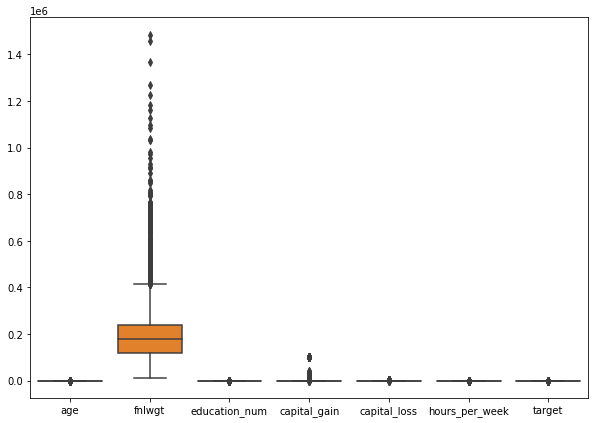

In [8]:
fig=plt.figure(figsize=(10,7))
sns.boxplot(data=training)
plt.show()

OH MAN!! What outliers I see !


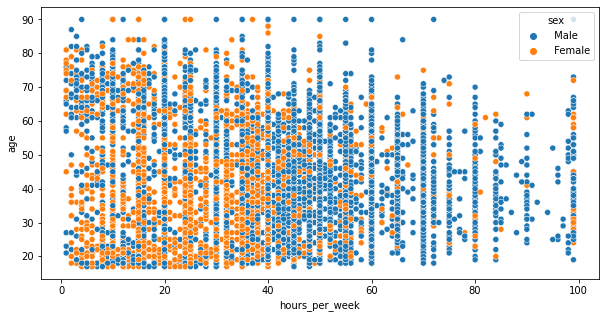

In [9]:
fig=plt.figure(figsize=(10,5))
sns.scatterplot(data=training,x='hours_per_week',y='age',hue='sex')
plt.show()

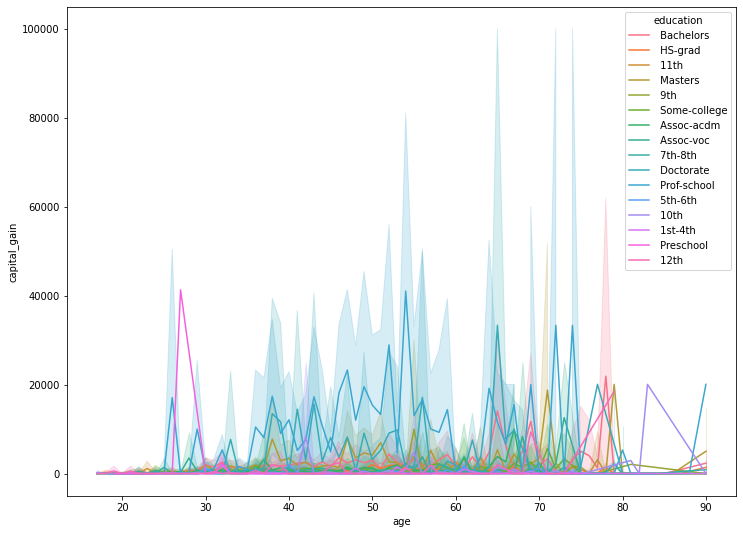

In [10]:
fig=plt.figure(figsize=(12,9))
sns.lineplot(x='age',y='capital_gain',hue='education',data=training)
plt.show()

### **Clean and Preprocess your Data** (Hint: One-Hot-Encode Categoricals)
Hint: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

First I should remove the outliers

In [11]:
y = training['fnlwgt']
removed_outliers = y.between(y.quantile(.05), y.quantile(.95))
training['fnlwgt']=training['fnlwgt'][removed_outliers]
test['fnlwgt']=training['fnlwgt'][removed_outliers]
X_train['fnlwgt']=training['fnlwgt'][removed_outliers]
X_test['fnlwgt']=training['fnlwgt'][removed_outliers]



y = training['capital_gain']
removed_outliers = y.between(y.quantile(.05), y.quantile(.95))
training['capital_gain']=training['capital_gain'][removed_outliers]
test['capital_gain']=test['capital_gain'][removed_outliers]
X_train['capital_gain']=X_train['capital_gain'][removed_outliers]
X_test['capital_gain']=X_test['capital_gain'][removed_outliers]


After removing all outliers, I want to check here:

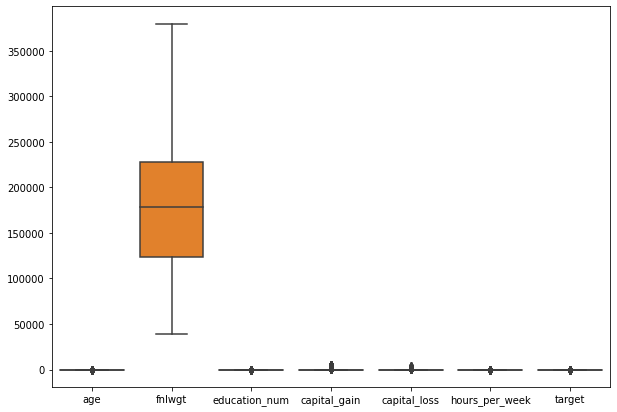

In [12]:
fig=plt.figure(figsize=(10,7))
sns.boxplot(data=training)
plt.show()

Well Done Khalid!

Jumping to the next one

In [13]:
X_train.isnull().sum()

age                  0
workclass            0
fnlwgt            3256
education            0
education_num        0
marital_status       0
ooccupation          0
relationship         0
sex                  0
capital_gain      1579
capital_loss         0
hours_per_week       0
native_country       0
dtype: int64

In [14]:
X_train[X_train['fnlwgt'].isnull()==True]

,age,workclass,fnlwgt,education,education_num,marital_status,ooccupation,relationship,sex,capital_gain,capital_loss,hours_per_week,native_country
18,38,Private,NaN,11th,7,Married-civ-spouse,Sales,Husband,Male,0.0,0,50,United-States
32,45,Private,NaN,Bachelors,13,Divorced,Exec-managerial,Own-child,Male,0.0,1408,40,United-States
37,19,Private,NaN,HS-grad,9,Married-AF-spouse,Adm-clerical,Wife,Female,0.0,0,25,United-States
40,31,Private,NaN,9th,5,Married-civ-spouse,Machine-op-inspct,Husband,Male,0.0,0,43,United-States
50,25,Private,NaN,Some-college,10,Married-civ-spouse,Exec-managerial,Wife,Female,0.0,0,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32506,38,Private,NaN,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Male,0.0,0,55,United-States
32511,25,Local-gov,NaN,Bachelors,13,Never-married,Adm-clerical,Own-child,Female,0.0,0,40,United-States
32531,30,?,NaN,Bachelors,13,Never-married,?,Not-in-family,Female,0.0,0,99,United-States
32550,43,Self-emp-not-inc,NaN,Some-college,10,Married-civ-spouse,Craft-repair,Husband,Male,0.0,0,50,United-States


Ops! I found an error that the Knn model dose not accept the X_train as there are null values! so I checked it and suprised that was true. So where did the null come from?

I made my search and noticed that some of "fnlwgt" and "capital_gain" observations have been changed to null when I removed the outliers.

I do not know the reason but I tried several times to fix the issue and have not reached a solution yet.

However, I noticed that there is no outliers essentially. I found all of "fnlwgt" values close to each other. Maybe there was an issui in the box plot that showed me the outliers.

So now I will reset the data to the oregenal dataset

In [15]:
# Starter Code --DO NOT ADJUST--
col_names = ["age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "ooccupation", "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country", "target"]
training = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", names=col_names).drop("race", axis=1)
test = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test", names=col_names, skiprows=1).drop("race", axis=1)

training["target"] = training["target"].apply(lambda x: x.strip())
test["target"] = test["target"].apply(lambda x: x.strip()[:-1])

# Create Train
X_train = training.drop("target", axis=1)
y_train = training["target"]

# Create Test
X_test = test.drop("target", axis=1)
y_test = test["target"]


training["target"] = training["target"].replace(['<=50K','>50K'],(1,0))
test["target"] =test["target"].replace(['<=50K','>50K'],(1,0))
y_train=y_train.replace(['<=50K','>50K'],(1,0))
y_test =y_test.replace(['<=50K','>50K'],(1,0))
print('Data is successfuly changed!')

Data is successfuly changed!


In [16]:
training_dummy=pd.get_dummies(data=training.iloc[:,:-1])
X_train_dummy=pd.get_dummies(data=X_train.iloc[:,:-1])
X_test_dummy=pd.get_dummies(data=X_test.iloc[:,:-1])

### **Create a kNN model** 



In [17]:
KNeighborsClassifier()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [18]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train_dummy, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [19]:
pred=knn.predict(X_test_dummy)

### **Show us your confusion matrix and explain the results**

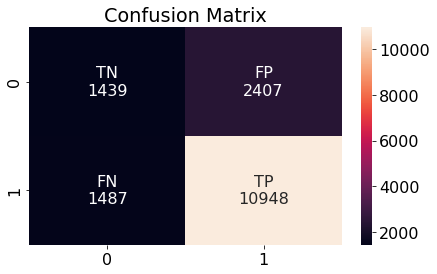

In [20]:
cf = confusion_matrix(y_test, pred)

names =  ['TN', 'FP', 'FN','TP']
# make %s seen in graph
perc = ["{0}".format(value) for value in
                     cf.flatten()]
# make strings from bundle of names & perc
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(names, perc)]
labels = np.asarray(labels).reshape(2, 2)

# make plot
plt.figure(figsize=(7, 4))  # set up white canvis
plt.rcParams.update({'font.size': 16})  # font size
sns.heatmap(cf, annot=labels, fmt='').set_title("Confusion Matrix");

your stuff here

### **Compare to Baseline model and explain the results**

In [21]:
knn_score=mean_squared_error(y_test, pred)
knn_score

0.23917449788096554

In [22]:
print(f'Baseline score is:{baseline_score} ,and the KNN score is:{knn_score}')

Baseline score is:0.1804444290101221 ,and the KNN score is:0.23917449788096554


As seen the baseline has the best score, so we go forward with it

### **BONUS ☝️**
- Create a Logistic Regression Model
- Compare results to kNN and Baseline and explain the results



In [23]:
lr=LogisticRegression(fit_intercept=True,
                      warm_start=False)

In [24]:
lr.fit(X_train_dummy, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
pred=lr.predict(X_test_dummy)
pred

array([1, 1, 1, ..., 1, 0, 1])

In [26]:
LogisticRegression_score= mean_squared_error(y_test, pred)
LogisticRegression_score

0.20219888213254714

In [27]:
print(f'Baseline score is:{baseline_score} \nKNN score is:{knn_score}\nLogisticRegression score is:{LogisticRegression_score}')

Baseline score is:0.1804444290101221 
KNN score is:0.23917449788096554
LogisticRegression score is:0.20219888213254714


As seen the best score goes with Baseline score

### **BONUS ✌️**
- Use GridSearchCV with your Logistic Regression with `cv=10` passed into your grid

In [28]:

p_grid = {'fit_intercept': [True, False],
          'warm_start': [True, False]}

grid = GridSearchCV(lr, p_grid, cv=10)


In [29]:
grid.fit(X_train_dummy, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'fit_intercept': [True, False],
                         'warm_start': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [30]:
grid.best_params_

{'fit_intercept': False, 'warm_start': True}

In [31]:
grid.best_score_

0.7977949873981498